#                                GRIP - The Spark Foundation

#                                  Name: Gabani Dipkumar P.

#                          Task : Prediction using Unsupervised ML

 In this dataset, we predict the optimum number of clusters for 'Iris' dataset and visualize it by graph ploting....
 We use KMeans model for finding the optimal number of clusters.....

In [1]:
#-----import moduls---------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
#------------import the dataset---------------------
dataset = pd.read_csv('Iris.csv')

In [3]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#----------------------------checking for missing values-------------------------------------
dataset.isna().sum()    #wow! its great, our dataset doesn't contain any missing value...

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
#----------------------convert data in X and Y form---------------------------
X = dataset.iloc[:, 1:-1].values
Y = dataset.iloc[:, -1].values

In [6]:
#-----------------------Encoding the dependent variable------------------------
from sklearn.preprocessing import LabelEncoder
lable = LabelEncoder()
Y = lable.fit_transform(Y)

In [7]:
#-------------------Let's first choosing the number of cluster using Elbow method---------------
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    k_means = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10,random_state=22)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

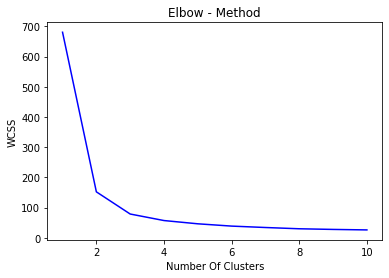

In [8]:
#-------------------Let's plot graph to find number of cluster using wcss-------------------
plt.plot(range(1,11),wcss,color='blue')
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow - Method')
plt.show() 

In [9]:
#---------------------Let's use k=3 and fit into our model---------------------------------
k_means = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=22)
y_pred = k_means.fit_predict(X)

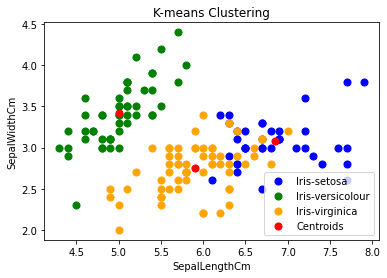

In [10]:
#--------------------Let's visualize clusters on the 'SepalLengthCm' and 'SepalWidthCm'-----------------------------
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s = 50, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s = 50, c = 'orange', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')
plt.title('K-means Clustering')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()
plt.show()

Now, for any new data we can predict from which cluster input data is belonging....